# Maturità 2023 (suppletiva) - Problema 1

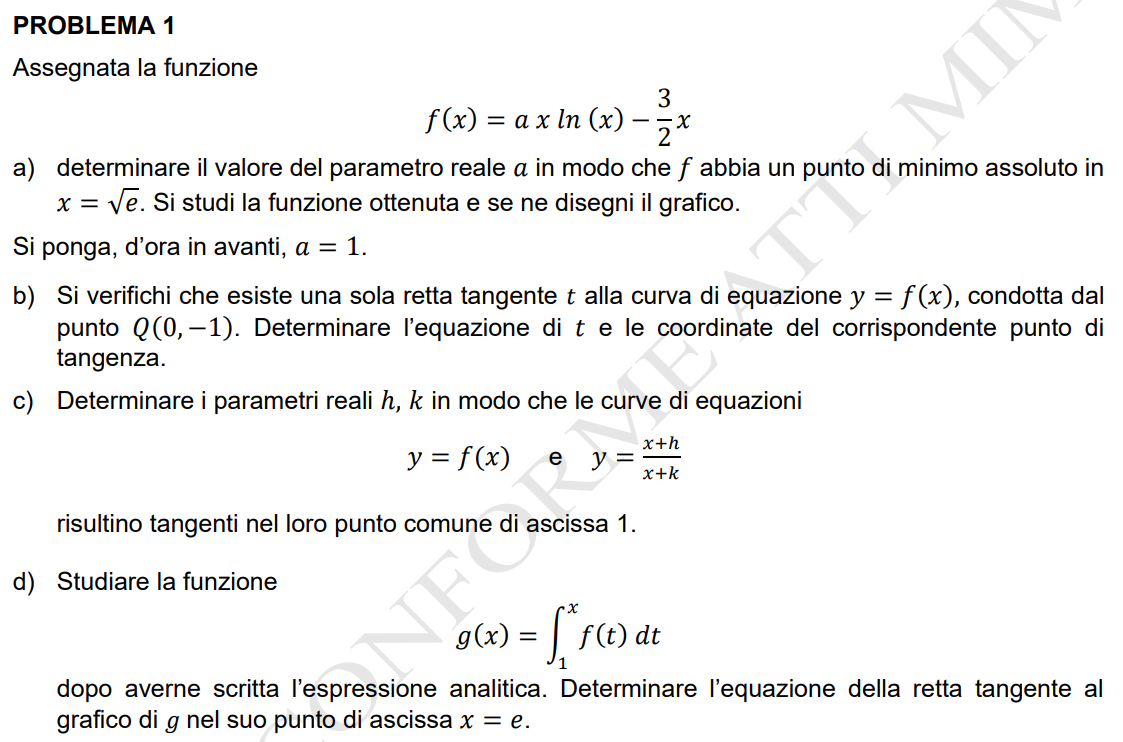

In [1]:
# Toolbox simbolico
from sympy import *

## Premessa

Assegnata la funzione $$f(x)=a x \ln{x} - {3\over 2}x$$

In [2]:
x = symbols('x', real=True)
a = symbols('a', real=True)

f_a = a*x*log(x) - 3*x/2
f_a

a*x*log(x) - 3*x/2

## Punto a

determinare il valore del parametro reale $a$ in modo che $f$ abbia un punto di minimo assoluto in $x=\sqrt{e}$.

Si studi la funzione ottenuto e se ne disegni il grafico.

Dominio $x>0$

In [3]:
# derivata prima
f_a_prime  = diff(f_a,x)
display(f_a_prime)

a*log(x) + a - 3/2

In [4]:
# Punto di stazionarieta
xstaz = solve(f_a_prime,x)[0]
print_latex(xstaz)
xstaz

e^{\frac{3 - 2 a}{2 a}}


exp((3 - 2*a)/(2*a))

In [5]:
# Vincolo punto di stazionarietà
xmin = sqrt(exp(1))
xmin

exp(1/2)

In [6]:
# Ricerca del valore di a che garantisce il punto di minimo richiesto
asol = solve(Eq(xstaz,xmin), a)[0]
asol

1

In [7]:
# Funzione con la sua derivata
f = f_a.subs(a,asol)
display(f)
f_prime = f_a_prime.subs(a,asol)
display(f_prime)

x*log(x) - 3*x/2

log(x) - 1/2

In [8]:
# Valore della funzione nel punto di minimo
ymin = f.subs(x,xmin)
factor(ymin)

-exp(1/2)

In [9]:
# Limite per x->0+
limit(f,x,0,"+")

0

In [10]:
# Limite per x->+oo
limit(f,x,+oo)

oo

In [11]:
# Ricerca di eventuali asintoti obliqui
m = limit(f/x,x,+oo)
m

oo

In [12]:
# Pendenza derivata prima vicino allo zero
limit(f_prime,x,0,"+")

-oo

In [13]:
xzero = solve(f,x)[0]
yzero = f.subs(x,xzero)
display(xzero, yzero)

exp(3/2)

0

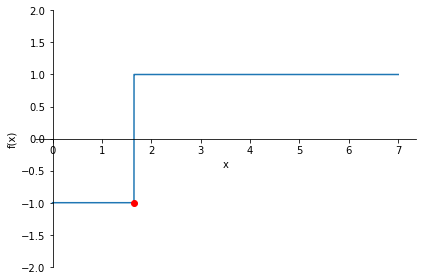

In [14]:
# Studio del segno della derivata prima

p1 = plot(sign(f_prime),(x,1e-8,7), ylim=(-2, 2), markers=[{'args': [xmin, -1, 'ro']}])

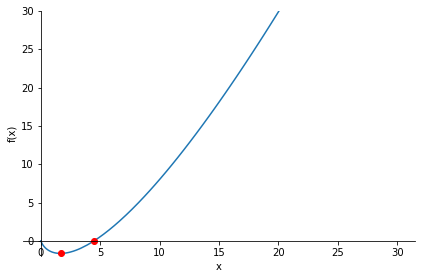

In [15]:
p1 = plot(f,(x,1e-8,30), ylim=(-2, 30), markers=[{'args': [[xmin,xzero], [ymin,yzero], 'ro']}])

## Punto b

Si ponga, d'ora in avanti, $a=1$.

Si verifiche che esiste una sola retta tangente $t$ alla curva di equazione $y=f(x)$, condotta dal punto $Q(0,-1)$. Determinare l'equazione di $t$ e le coordinate del corrispondente punto di tangenza.
 

In [16]:
Qx = simplify(0)
Qy = simplify(-1)
print("Q")
Qx,Qy

Q


(0, -1)

In [17]:
m = symbols('m', real=True)

In [29]:
# Scrittura del fascio proprio di rette passante per Q
y = Qy + m*(x-Qx)
y

m*x - 1

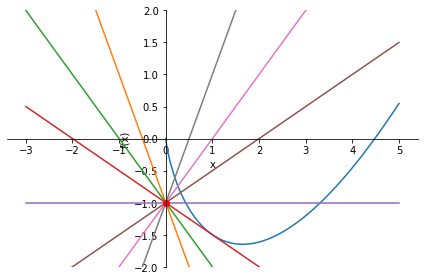

In [33]:
p1 = plot(f,(x,1e-8,5), ylim=(-2, 2), show=False, markers=[{'args': [[Qx], [Qy], 'ro']}])
for mv in [-2,-1,-0.5, 0, 0.5, 1,2]:
    p2 = plot(y.subs(m,mv),(x,-3,5), ylim=(0, 5), show=False)
    p1.append(p2[0])
p1.show()

In [19]:
# Devo risolvere il sistema: 
# 1. Passaggio per lo stesso punto
# 2. Condizioni di tangenza: derivata prima = coeff. angolare retta

eq1 = Eq(f,y)
print(eq1)

eq2 = Eq(f_prime, m)
eq2

Eq(x*log(x) - 3*x/2, m*x - 1)


Eq(log(x) - 1/2, m)

In [20]:
# Risoluzione numerica
tancond = nsolve((eq1,eq2),(m,x), (1,1))
tancond

Matrix([
[-0.5],
[ 1.0]])

In [21]:
# Risoluzione simbolica
msol =  solve(eq2,m)[0]
print(msol)

log(x) - 1/2


In [22]:
eq1_subm = eq1.subs(m,msol)
eq1_subm

Eq(x*log(x) - 3*x/2, x*(log(x) - 1/2) - 1)

In [23]:
eq1_subm_simple = expand(eq1_subm.lhs - eq1_subm.rhs)
eq1_subm_simple

1 - x

In [24]:
xsol = solve(eq1_subm_simple,x)[0]
print(xsol)

1


In [25]:
msol = msol.subs(x,xsol)
print(msol)

-1/2


In [26]:
# Retta tangente
tretta = y.subs(m,msol)
tretta

-x/2 - 1

In [27]:
# y punto di tangenza
ytan = tretta.subs(x,xsol)
ytan

-3/2

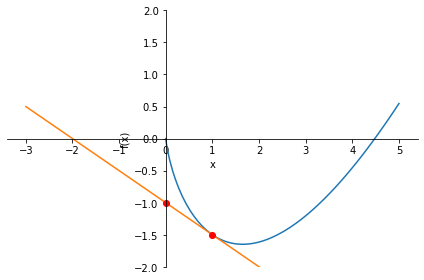

In [28]:
p1 = plot(f,(x,1e-8,5), ylim=(-2, 2), show=False, markers=[{'args': [[Qx,xsol], [Qy,ytan], 'ro']}])
p2 = plot(tretta,(x,-3,5), ylim=(0, 5), show=False)
p1.append(p2[0])
p1.show()

## Punto c

Determinare i parametri reali $h$, $k$ in modo che le curve di equazione $$y=f(x) \quad \text{ e } \quad y={x+h\over x+k}$$ risultino tangenti nel loro punto comune di ascissa $x=1$.

In [34]:
# Valore della funzione in x=1
xp = simplify(1)
yp = f.subs(x,xp)
(xp, yp)

(1, -3/2)

In [35]:
h,k = symbols('h,k', real=True)

In [36]:
yhk = (x+h) / (x+k)
yhk

(h + x)/(k + x)

In [37]:
# Valore di yhk in x=1
yhkp = yhk.subs(x,xp)
yhkp

(h + 1)/(k + 1)

In [38]:
# Equazione 1: passaggio per lo stesso punto
eq1 = Eq(yp,yhkp)
eq1

Eq(-3/2, (h + 1)/(k + 1))

In [39]:
factor(solve(eq1,h)[0]-k)#*2

-5*(k + 1)/2

In [40]:
# Equazione 2: stessa derivata prima

# Derivata prima di yhk
yhk_prime = diff(yhk, x)
yhk_prime

-(h + x)/(k + x)**2 + 1/(k + x)

In [41]:
# Valore della derivata prima in x=1 della funzione
yp_prime = f_prime.subs(x,1)
yp_prime

-1/2

In [42]:
# Valore della derivata prima in x=1 di yhk
yhkp_prime = yhk_prime.subs(x,1)
yhkp_prime

-(h + 1)/(k + 1)**2 + 1/(k + 1)

In [43]:
# Equazione 2: stessa derivata prima
eq2 = Eq(yp_prime, yhkp_prime)
eq2

Eq(-1/2, -(h + 1)/(k + 1)**2 + 1/(k + 1))

In [44]:
# Risoluzione sistema
hksol = solve([eq1,eq2],[h,k])[0]
hksol

(13/2, -6)

In [45]:
yhk_func = yhk.subs([(h,hksol[0]),(k,hksol[1])])
yhk_func

(x + 13/2)/(x - 6)

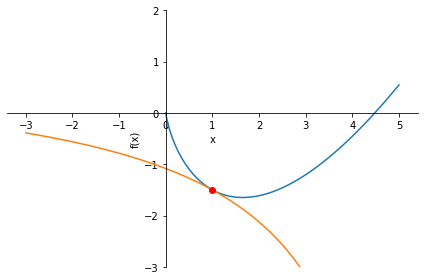

In [46]:
p1 = plot(f,(x,1e-8,5), ylim=(-3, 2), show=False, markers=[{'args': [[xsol], [ytan], 'ro']}])
p2 = plot(yhk_func,(x,-3,5), ylim=(0, 5), show=False)
p1.append(p2[0])
p1.show()

In [54]:
y = symbols('y', real=True)

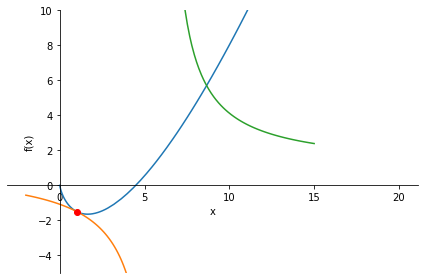

In [62]:
p1 = plot(f,(x,1e-8,20), ylim=(-5, 10), show=False, markers=[{'args': [[xsol], [ytan], 'ro']}])
p2 = plot(yhk_func,(x,-2,5), ylim=(-5, 10), show=False)
p3 = plot(yhk_func,(x,6,15), ylim=(-5, 10), show=False)
# p4 = plot(simplify(1)+0*x,(x,-2,15), ylim=(-5, 10), show=False) # da valutare (x=6 e y=1)
# p5 = plot_implicit(Eq(x,6), (x,5,7), (y, -4, 10), show=False)
p1.append(p2[0])
p1.append(p3[0])
# p1.append(p4[0])
# p1.append(p5[0])
p1.show()

## Punto d
Studiare la funzione $$g(x)=\int_1^{x}f(t)\,dt$$ dopo averne scritta l'espressione analitica.

Determinare l'equazione della retta tangente al grafico di $g$ nel suo punto di ascissa $x=e$

In [63]:
t = symbols('t', real=True)

In [64]:
integrate(f.subs(x,t), t)


t**2*log(t)/2 - t**2

In [65]:
g = integrate(f.subs(x,t), (t,1,x))
g

x**2*log(x)/2 - x**2 + 1

La derivata prima coincide con la funzione $g'(x) = f(x)$ e la derivata seconda con la derivata prima di $f$, i.e. $g''(x) = f'(x)$

Teorema fondamentale del calcolo, altrimenti dovrei aver utilizzato la regola delle composizione delle funzioni composte

$g(1)=0$

In [66]:
# Zeri della funzione
xzero = solve(f,x)[0]
yzero = g.subs(x,xzero)
print(xzero, ", ", yzero)

exp(3/2) ,  1 - exp(3)/4


In [67]:
# Studio del segno di f

factor(f)

x*(2*log(x) - 3)/2

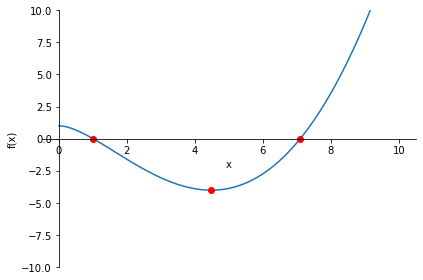

In [68]:
# Plot
p1 = plot(g,(x,1e-8,10), ylim=(-10, 10), markers=[{'args': [[xzero,1,7.10177815769109], [yzero,0,0], 'ro']}])

In [69]:
# Retta tangente
x0 = exp(1)
print(x0)
m = f.subs(x,x0)
m


E


-E/2

In [70]:
# Punto di passaggio
y0 = g.subs(x,x0)
y0


1 - exp(2)/2

In [71]:
# Retta tangente
y = y0 + m*(x-x0)
simplify(y)

-E*x/2 + 1

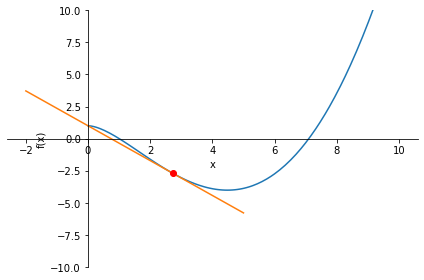

In [72]:
p1 = plot(g,(x,1e-8,10), ylim=(-10, 10), markers=[{'args': [[x0], [y0], 'ro']}], show=False)
p2 = plot(y,(x,-2,5), ylim=(-5, 10), show=False)
p1.append(p2[0])
p1.show()

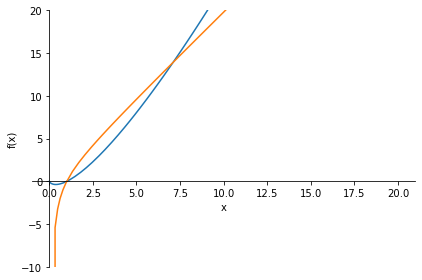

In [73]:
p1 = plot(x*log(x),(x,1e-8,20), ylim=(-10, 20), show=False)
p2 = plot(2*x-2/x,(x,1e-8,20), ylim=(-10, 20), show=False)
p1.append(p2[0])
p1.show()

In [74]:
nsolve(x**2*log(x)/2-x**2+1,x,7)

7.10177815769109